In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import fnmatch
from tqdm import tqdm
import matplotlib

# Load Data

In [2]:
data_dir = 'scratch/batch_01' # specify data folder here

In [3]:
data = [] # list container to store the data 

for file in tqdm(sorted(fnmatch.filter(os.listdir(data_dir),"*.json"))):
    with open(os.path.join(data_dir,file)) as f:
        tmp = json.load(f)
    data.append(tmp)
print('loaded %s file(s)' %len(data))

100%|██████████| 16/16 [00:00<00:00, 457.15it/s]

loaded 16 file(s)


In [4]:
t_adh_lst = []
for dict in data:
    t_adh_lst.append(dict["settings"]["t_adh"])
print(t_adh_lst)

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 10.0, 2.0, 20.0, 3.0, 5.0]


(0.267004, 0.004874, 0.329415, 1.0)


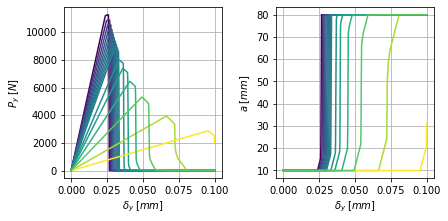

In [5]:
fig, axs = plt.subplots(1,2,figsize=(6.3,6.3/2))

axs = axs.flatten()
data_max = [] 


norm = matplotlib.colors.LogNorm(vmin=min(t_adh_lst), vmax=max(t_adh_lst))

cmap = matplotlib.cm.get_cmap('viridis')

print(cmap(0))
for dict in data:
    u2      = np.array(dict["results"]["U2_RP-1"])
    RF2     = np.array(dict["results"]["RF2_RP-1"])
    ETOTAL  = np.array(dict["results"]["ETOTAL"])
    ALLWK  = np.array(dict["results"]["ALLWK"])
    ALLIE  = np.array(dict["results"]["ALLIE"])
    CAREA   = np.array(dict["results"]["CAREA"])

    a0      = dict["settings"]["a_0"]
    l       = dict["settings"]["l"]
    w       = dict["settings"]["w_spec"]
    t_adh   = dict["settings"]["t_adh"]

    ## calculate crack length
    a= np.append(a0,l- CAREA[1:]/w)
    ## Calculate crack area
    A = a * w

    axs[0].plot(u2,RF2,color=cmap(norm(t_adh)))
    axs[1].plot(u2,a,color=cmap(norm(t_adh)))
    


for ax in axs: ax.grid()

axs[0].set_xlabel(r'$\delta_y\; [mm]$')
axs[1].set_xlabel(r'$\delta_y\; [mm]$')

axs[0].set_ylabel(r'$P_y\; [N]$')
axs[1].set_ylabel(r'$a\; [mm]$')

# fig.colorbar()

fig.tight_layout(pad=1.0)
fig.savefig('fig_1.pdf')

[10.     9.875  9.875 ... 80.    80.    80.   ]
[10.     9.875  9.875 ... 80.    80.    80.   ]
[10.     9.875  9.875 ... 80.    80.    80.   ]
[10.     9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875  9.875
  9.

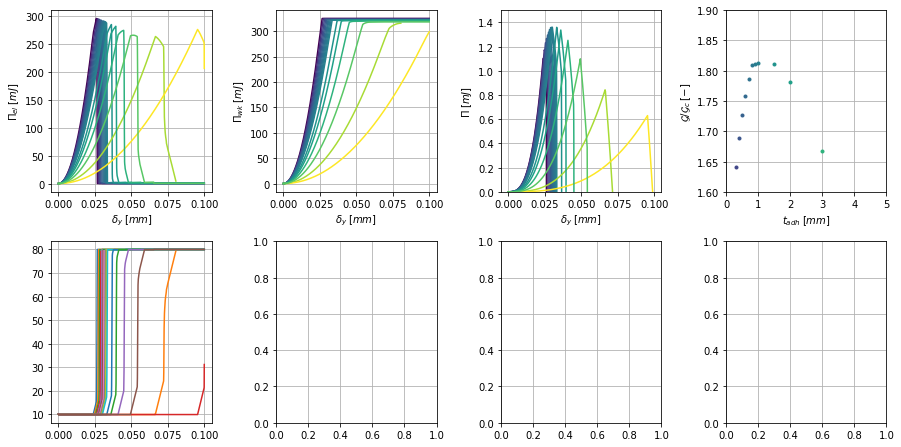

In [169]:
fig, axs = plt.subplots(2,4,figsize=(6.3*2,6.3))

axs = axs.flatten()
data_max = [] 


norm = matplotlib.colors.LogNorm(vmin=min(t_adh_lst), vmax=max(t_adh_lst))

cmap = matplotlib.cm.get_cmap('viridis')

for dict in data:
    u2      = np.array(dict["results"]["U2_RP-1"])
    RF2     = np.array(dict["results"]["RF2_RP-1"])
    ETOTAL  = np.array(dict["results"]["ETOTAL"])
    ALLWK  = np.array(dict["results"]["ALLWK"])
    ALLIE  = np.array(dict["results"]["ALLIE"])
    CAREA   = np.array(dict["results"]["CAREA"])

    a0      = dict["settings"]["a_0"]
    l       = dict["settings"]["l"]
    w       = dict["settings"]["w_spec"]
    t_adh   = dict["settings"]["t_adh"]

    ## calculate crack length
    a= np.append(a0,l- CAREA[1:]/w)
    ## Calculate crack area
    A = a * w

    axs[0].plot(u2,(ALLIE),color=cmap(norm(t_adh)))
    axs[1].plot(u2,(ALLWK),color=cmap(norm(t_adh)))
    axs[2].plot(u2,(ETOTAL),color=cmap(norm(t_adh)))
    axs[3].plot(t_adh,max(ETOTAL)/20*100/3.75,'.',color=cmap(norm(t_adh)))
    print(A)
    # axs[4].plot(a,ETOTAL/A*100,'.',color=cmap(norm(t_adh)))  
    axs[4].plot(u2,a)
for ax in axs: ax.grid()

axs[0].set_xlabel(r'$\delta_y\; [mm]$')
axs[1].set_xlabel(r'$\delta_y\; [mm]$')
axs[2].set_xlabel(r'$\delta_y\; [mm]$')
axs[3].set_xlabel(r'$t_{adh}\; [mm]$')

axs[0].set_ylabel(r'$\Pi_{el}   \;  [mJ]$')
axs[1].set_ylabel(r'$\Pi_{wk}   \;  [mJ]$')
axs[2].set_ylabel(r'$\Pi    \;  [mJ]$')
axs[3].set_ylabel(r'$\mathcal{G}/\mathcal{G}_c    \;  [-]$')

# axs[3].set_xlim([0,3])
# fig.colorbar()
axs[2].set_ylim([0,1.5])
axs[3].set_ylim([1.6,1.9])
axs[3].set_xlim([0,5])
fig.tight_layout(pad=1.0)
fig.savefig('fig_2.pdf')